In [1]:
import pandas as pd


In [7]:

df = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/CellTypeAssignment metrics/Celltypist/Celltypist_confidence_scores.csv')
print(df.head())

    Model  Median Confidence Score  Mean Confidence Score
0   ENACT                 0.203616               0.310001
1     B2C                 0.208921               0.305640
2      SC                 0.879023               0.717515
3    HCRC                 0.979433               0.741466
4  Tonsil                 0.970979               0.742450


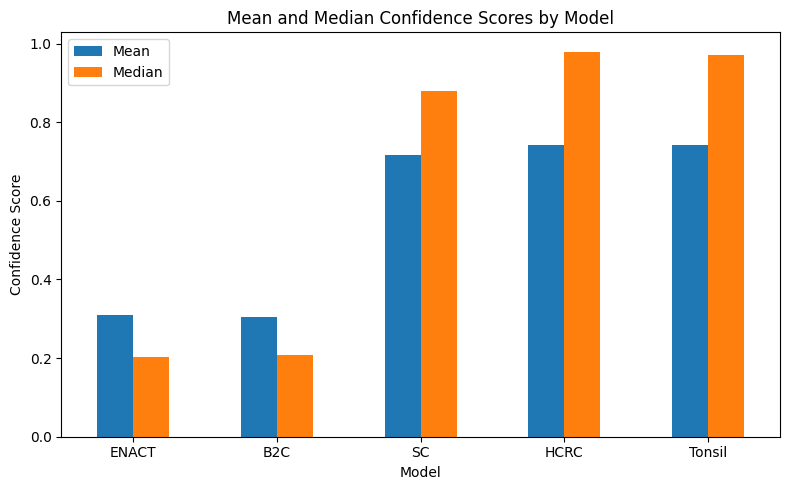

In [8]:
import matplotlib.pyplot as plt

# Plot mean and median confidence scores for each model
ax = df.plot(
    x='Model',
    y=['Mean Confidence Score', 'Median Confidence Score'],
    kind='bar',
    figsize=(8, 5),
    rot=0
)
plt.ylabel('Confidence Score')
plt.title('Mean and Median Confidence Scores by Model')
plt.legend(['Mean', 'Median'])
plt.tight_layout()
plt.show()

In [11]:
df_counts = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/CellTypeAssignment metrics/Celltypist/Celltypist_predicted_cell_types_counts.csv')
print(df_counts.head())

  Cell Type pred      SC    ENACT      B2C
0           AT1   2966.0   2235.0   1521.0
1            AT2  7025.0  18365.0  18117.0
2       B_memory  3076.0  16910.0  13919.0
3        B_naive   319.0     93.0     47.0
4   B_plasma_IgA  1356.0   5188.0   3735.0


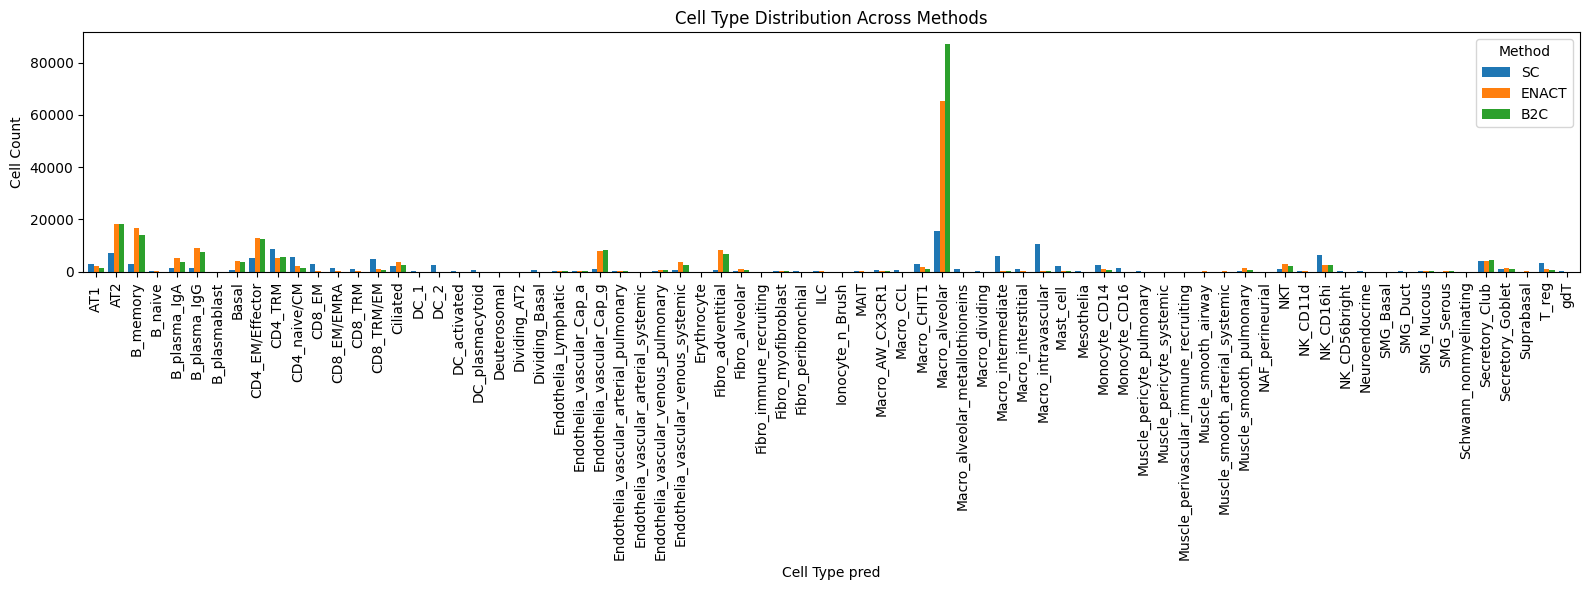

In [12]:
df_counts.set_index('Cell Type pred')[['SC', 'ENACT', 'B2C']].plot(
    kind='bar',
    figsize=(16, 6),
    width=0.8
)
plt.ylabel('Cell Count')
plt.title('Cell Type Distribution Across Methods')
plt.legend(title='Method')
plt.tight_layout()
plt.show()

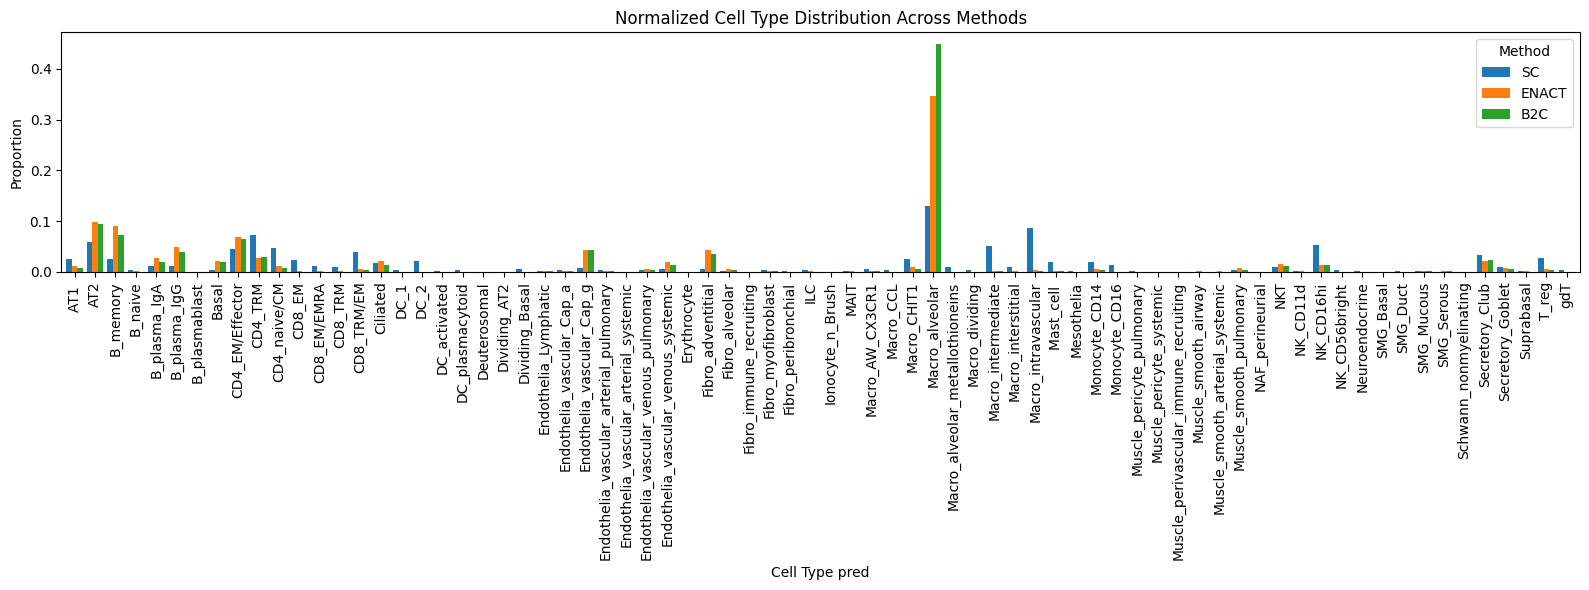

In [13]:
normalized_counts = df_counts.set_index('Cell Type pred')[['SC', 'ENACT', 'B2C']].div(
    df_counts[['SC', 'ENACT', 'B2C']].sum()
)
normalized_counts.plot(
    kind='bar',
    figsize=(16, 6),
    width=0.8
)
plt.ylabel('Proportion')
plt.title('Normalized Cell Type Distribution Across Methods')
plt.legend(title='Method')
plt.tight_layout()
plt.show()

In [26]:
print(df_counts['Cell Type pred'])

0                 AT1 
1                  AT2
2             B_memory
3              B_naive
4         B_plasma_IgA
            ...       
69      Secretory_Club
70    Secretory_Goblet
71          Suprabasal
72               T_reg
73                 gdT
Name: Cell Type pred, Length: 74, dtype: object


In [28]:
# Create a cell type map by mapping each label to its prefix (before the first underscore)
cell_type_map = {
    label: label.split('_')[0] if '_' in label else label
    for label in df_counts['Cell Type pred'].unique()
}
print(cell_type_map)

{'AT1 ': 'AT1 ', 'AT2': 'AT2', 'B_memory': 'B', 'B_naive': 'B', 'B_plasma_IgA': 'B', 'B_plasma_IgG': 'B', 'B_plasmablast': 'B', 'Basal': 'Basal', 'CD4_EM/Effector': 'CD4', 'CD4_TRM': 'CD4', 'CD4_naive/CM': 'CD4', 'CD8_EM': 'CD8', 'CD8_EM/EMRA': 'CD8', 'CD8_TRM': 'CD8', 'CD8_TRM/EM': 'CD8', 'Ciliated': 'Ciliated', 'DC_1': 'DC', 'DC_2': 'DC', 'DC_activated': 'DC', 'DC_plasmacytoid': 'DC', 'Deuterosomal': 'Deuterosomal', 'Dividing_AT2': 'Dividing', 'Dividing_Basal': 'Dividing', 'Endothelia_Lymphatic': 'Endothelia', 'Endothelia_vascular_Cap_a': 'Endothelia', 'Endothelia_vascular_Cap_g': 'Endothelia', 'Endothelia_vascular_arterial_pulmonary': 'Endothelia', 'Endothelia_vascular_arterial_systemic': 'Endothelia', 'Endothelia_vascular_venous_pulmonary': 'Endothelia', 'Endothelia_vascular_venous_systemic': 'Endothelia', 'Erythrocyte': 'Erythrocyte', 'Fibro_adventitial': 'Fibro', 'Fibro_alveolar': 'Fibro', 'Fibro_immune_recruiting': 'Fibro', 'Fibro_myofibroblast': 'Fibro', 'Fibro_peribronchial': 

In [29]:

# Add a column for the broad/general cell type
df_counts['Broad_Cell_Type'] = df_counts['Cell Type pred'].map(cell_type_map).fillna(df_counts['Cell Type pred'])

# Aggregate the counts by the new broad/general cell types
aggregated_counts = df_counts.groupby('Broad_Cell_Type')[['SC', 'ENACT', 'B2C']].sum()
# Remove rows where the broad cell type is the same as the original fine cell type
original_fine_types = set(df_counts['Cell Type pred'].unique())
broad_types_only = [ct for ct in aggregated_counts.index if ct not in original_fine_types]
aggregated_counts = aggregated_counts.loc[broad_types_only]
print(aggregated_counts)

                      SC    ENACT      B2C
Broad_Cell_Type                           
B                 6228.0  31411.0  25380.0
CD4              19746.0  20135.0  19823.0
CD8              10052.0   1380.0    852.0
DC                3524.0    162.0     89.0
Dividing           589.0     82.0     67.0
Endothelia        2890.0  13064.0  11824.0
Fibro             1464.0   9825.0   7556.0
Ionocyte             5.0      0.0      0.0
Macro            39038.0  68241.0  88913.0
Mast              2239.0    248.0    165.0
Monocyte          3922.0    942.0    606.0
Muscle             564.0   1768.0    851.0
NAF                  1.0      0.0      0.0
NK                6949.0   2746.0   2627.0
SMG                356.0    332.0    363.0
Schwann              0.0      1.0      0.0
Secretory         5090.0   5242.0   5347.0
T                 3290.0   1090.0    704.0


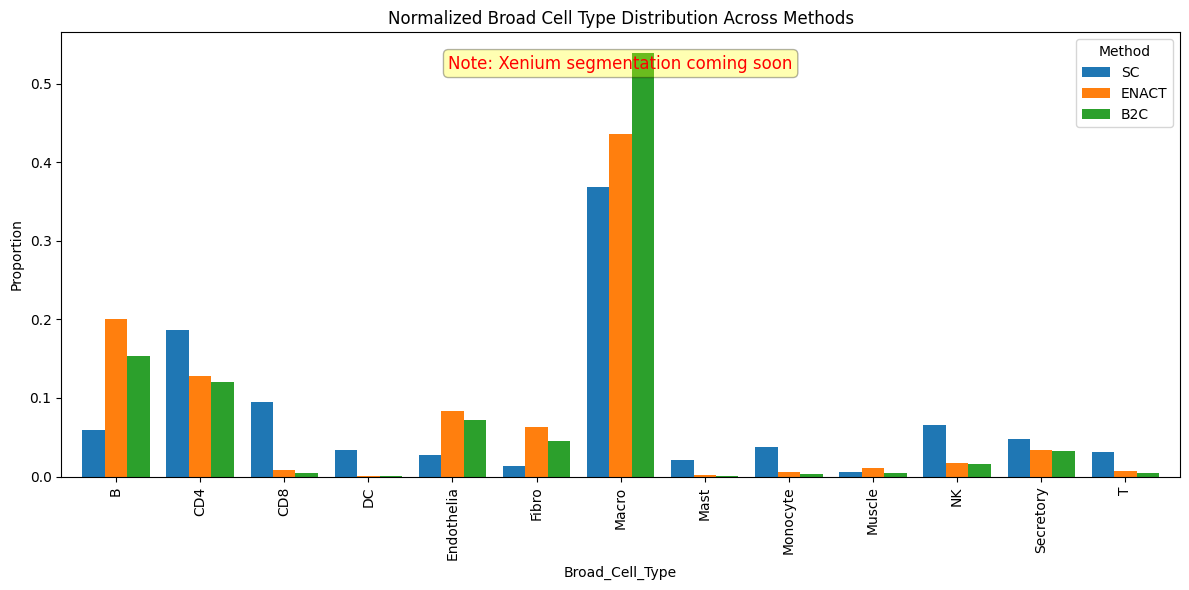

In [33]:
# Normalize the aggregated counts by column (method) totals
normalized_aggregated = aggregated_counts.div(aggregated_counts.sum())
# Remove broad cell types with less than 1% in all methods
normalized_aggregated = normalized_aggregated[(normalized_aggregated >= 0.01).any(axis=1)]
# Plot normalized broad cell type distributions for each method
normalized_aggregated.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8
)
plt.annotate(
    "Note: Xenium segmentation coming soon",
    xy=(0.5, 0.95),
    xycoords='axes fraction',
    ha='center',
    va='top',
    fontsize=12,
    color='red',
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3)
)
plt.ylabel('Proportion')
plt.title('Normalized Broad Cell Type Distribution Across Methods')
plt.legend(title='Method')
plt.tight_layout()
plt.show()